In [1]:
#library & package. 
#Jalankan ulang jika menambahkan library baru

import pandas as pd, numpy as np, matplotlib.pyplot as plt
import json, tweepy, requests, re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [2]:
with open("token.json")as f:
  tokens = json.load(f)

bearer_token = tokens['bearer_token']
api_key = tokens['api_key']
api_key_secret = tokens['api_key_secret']
access_token = tokens['access_token']
access_token_secret = tokens['access_token_secret']

In [3]:
#Apa kata kunci yang ingin kalian cari di twitter dan kenapa. 
#jelaskan singkat pada sel ini
'''
Kata kunci adalah Omicron. Karena ini merupakan varian baru yang menyebabkan
kasus covid mengalami peningkatan, sehingga pemerintah khususnya di DKI Jakarta
melakukan PPKM sekali lagi.
'''

'\nKata kunci adalah Omicron. Karena ini merupakan varian baru yang menyebabkan\nkasus covid mengalami peningkatan, sehingga pemerintah khususnya di DKI Jakarta\nmelakukan PPKM sekali lagi.\n'

In [5]:
#ambil data pada twitter dengan kata kunci tersebut.
#ambil sebanyak 300 tweet
#masukkan pada datarame dan tampilkan dataframenya

auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

key_search = "omicron"
query = key_search + " -filter:retweets"
response = tweepy.Cursor(api.search_tweets,
                         q = query,
                         lang = "id",
                         tweet_mode = "extended",
                         ).items(300)
data = [tweet.full_text for tweet in response]

df = pd.DataFrame(data, columns=["tweet"])
df

,tweet
0,Simak berbagai fakta dari COVID-19 Omicron yan...
1,Mw nyari kereta yg ada ads bday ten nya tapi o...
2,"@stevanpurba hahaha sedih banget yaaa, katanya..."
3,"Demi Keselamatan Masyarakat, Pemerintah Kembal..."
4,"Demi Keselamatan Masyarakat, Pemerintah Kembal..."
...,...
295,Indonesia memasuki gelombang ke-3 penyebaran C...
296,"Mayat Menumpuk di Rumah Sakit, Hong Kong Makin..."
297,"@azqanita21 sempet offline 1 minggu, tapi krn ..."
298,Sampurasun #SahabatTangguh\nBerikut SURAT EDAR...


In [6]:
#Lakukan Text Preprocessing (lakukan sebaik mungkin). Masukkan pada dataframe kalian dengan nama kolom tweet_clean.
#jangan lupa lakukan pembersihan slang word/bahasa gaul
#Tampilkan dataframe

# Menghilangkan angka, tanda baca dan whitespaces
non_angka = [re.sub(r"\d+", "", x) for x in df["tweet"]]
non_simbol = [x.translate(str.maketrans("","",string.punctuation)) for x in non_angka]
non_spaces = [x.strip() for x in non_simbol]

# Case Folding
case_folding = [item.lower() for item in non_spaces]

# Menghilangkan Stopwords
stop_words = set(stopwords.words("indonesian"))
word_token = [word_tokenize(item) for item in case_folding]
word_clean = []
for i in word_token:
  word_clean.append(" ".join([w for w in i if not w in stop_words]))

# Mengecek kata slang
word_list = [word_tokenize(x) for x in word_clean]
tweets = [word for tweet in word_list for word in tweet]
fqdist = FreqDist(tweets)
most_common_word = fqdist.most_common(100)
print(most_common_word)

[('omicron', 290), ('prokes', 162), ('pandemi', 114), ('basmi', 111), ('covid', 98), ('varian', 81), ('ppkm', 71), ('pemerintah', 61), ('penyebaran', 59), ('cegah', 50), ('menekan', 48), ('masyarakat', 43), ('terapkan', 43), ('vaksinasi', 41), ('efektif', 39), ('httpstcoigovfp', 29), ('disiplin', 28), ('keselamatan', 27), ('vaksin', 25), ('yg', 22), ('kesehatan', 20), ('•', 20), ('yaa', 18), ('indonesia', 18), ('gejala', 17), ('jenis', 15), ('kena', 15), ('virus', 15), ('protokol', 14), ('level', 14), ('penularan', 14), ('ga', 13), ('tanah', 13), ('air', 13), ('nya', 12), ('banget', 12), ('aja', 12), ('ya', 12), ('melanjutkan', 12), ('kebijakan', 12), ('memutus', 12), ('orang', 11), ('kaa', 11), ('corona', 11), ('gue', 10), ('anak', 9), ('beda', 8), ('epidemiolog', 8), ('mendukung', 8), ('sakit', 8), ('manfaatkan', 8), ('waktumu', 8), ('menangkan', 8), ('rupiah', 8), ('dominoqq', 8), ('aduq', 8), ('bandarqonline', 8), ('pokeruangasli', 8), ('palapaqq', 8), ('judionline', 8), ('bandarce

In [7]:
# Menghilangkan bahasa slang
slang_list = {
    "prokes" : "protokol kesehatan",
    "httpstcoigovfp" : "",
    "yg" : "yang",
    "•" : "",
    "yaa" : "iya",
    "ga" : "tidak",
    "nya" : "",
    "aja" : "saja",
    "ya" : "iya",
    "gue" : "aku",
    "dominoqq" : "",
    "aduq" : "",
    "pokeruangasli" : "",
    "palapaqq" : "",
    "judionline" : "",
    "bandarceme" : "",
    "pokerindonesia" : "",
    "sakong" : "",
    "bandarq" : "",
    "depositpulsa" : "",
    "ourmeissachanyeolday" : "",
    "ptdonstagela" : "",
    "mirafinalcheckpoint" : "",
    "stageforarmy" : "",
    "gak" : "tidak",
    "tp" : "tapi",
    "polisiindonesia" : "polisi indonesia",
    "tetep" : "tetap",
    "iyyaa" : "iya",
    "dah" : "sudah",
    "sih" : "",
    "kalo" : "kalau"
}

result = []
for tweet in word_clean:
  word_list2 = []
  for word in word_tokenize(tweet):
    if slang_list.get(word):
      word = slang_list[word]
    word_list2.append(word)
  result.append(" ".join(word_list2))

# Menghilangkan stopwords
word_token2 = [word_tokenize(item) for item in result]
word_clean2 = []
for i in word_token2:
  word_clean2.append(" ".join([w for w in i if not w in stop_words]))

# Mengubah setiap kata menjadi kata dasar
factory = StemmerFactory()
stemmer = factory.create_stemmer()
tweet_clean = []
for i in word_clean2:
  tweet_clean.append(stemmer.stem(i))

df["tweet_clean"] = tweet_clean
df

,tweet,tweet_clean
0,Simak berbagai fakta dari COVID-19 Omicron yan...,simak fakta covid omicron waspada hellosehat h...
1,Mw nyari kereta yg ada ads bday ten nya tapi o...,mw nyari kereta ads bday ten nya omicron nya t...
2,"@stevanpurba hahaha sedih banget yaaa, katanya...",stevanpurba hahaha sedih banget yaaa omicron j...
3,"Demi Keselamatan Masyarakat, Pemerintah Kembal...",selamat masyarakat perintah terap ppkm tekan s...
4,"Demi Keselamatan Masyarakat, Pemerintah Kembal...",selamat masyarakat perintah terap ppkm tekan s...
...,...,...
295,Indonesia memasuki gelombang ke-3 penyebaran C...,indonesia pasuk gelombang sebar covid varian o...
296,"Mayat Menumpuk di Rumah Sakit, Hong Kong Makin...",mayat tumpuk rumah sakit hong kong panik hadap...
297,"@azqanita21 sempet offline 1 minggu, tapi krn ...",azqanita sempet offline minggu krn omicron deh...
298,Sampurasun #SahabatTangguh\nBerikut SURAT EDAR...,sampurasun sahabattangguh surat edar dinas seh...


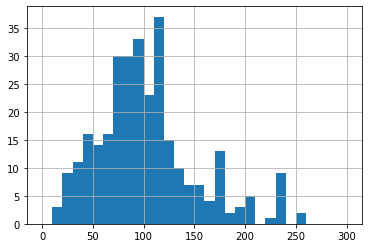

In [9]:
#lakukan semua Text Analysis, seperti word_frequency, mean_word_length, dsb.
#tampilkan plot dari setiap analysis
#dengan melihat word_frequency coba perbaiki pembersihan slang word pada tweet_clean
#tampilkan dataframe kalian

# Distribusi Frekuensi Karakter per Tweet
bin_range = np.arange(0, 310, 10)
df['tweet_clean'].str.len().hist(bins=bin_range)
plt.show()

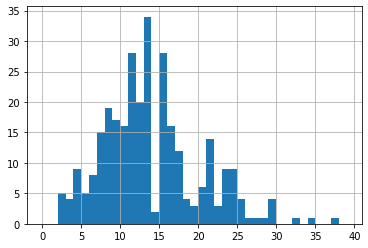

In [11]:
# Distribusi Jumlah Kata per Tweet
bin_range = np.arange(0, 40)
df['tweet_clean'].str.split().map(lambda x: len(x)).hist(bins=bin_range)
plt.show()

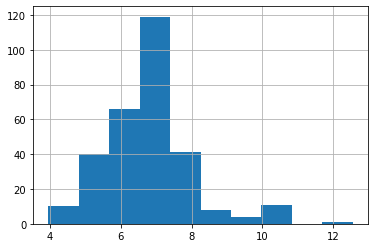

In [12]:
# Distribusi Panjang Rata - Rata Kata per Tweet
df['tweet_clean'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()
plt.show()

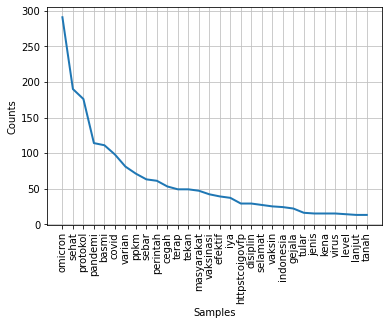

In [13]:
# Distribusi Kata
tweet_token = df["tweet_clean"].apply(lambda x: word_tokenize(str(x)))
tweets = [word for tweet in tweet_token for word in tweet]
fqdist = FreqDist(tweets)
fqdist.plot(30,cumulative=False)
plt.show()

In [14]:
# Karena sebelumnya sudah melakukan penghilangan kata slang sebanyak 2 kali, maka pembersihan slang kali ini hanya sedikit
slang_list2 = {
    "iya" : "",
    "httpstcoigovfp" : "",
}

result2 = []
for tweet in df["tweet_clean"]:
  word_list3 = []
  for word in word_tokenize(tweet):
    if slang_list.get(word):
      word = slang_list[word]
    word_list3.append(word)
  result2.append(" ".join(word_list3))

df["tweet_clean"] = result2
df

,tweet,tweet_clean
0,Simak berbagai fakta dari COVID-19 Omicron yan...,simak fakta covid omicron waspada hellosehat h...
1,Mw nyari kereta yg ada ads bday ten nya tapi o...,mw nyari kereta ads bday ten nya omicron nya t...
2,"@stevanpurba hahaha sedih banget yaaa, katanya...",stevanpurba hahaha sedih banget yaaa omicron j...
3,"Demi Keselamatan Masyarakat, Pemerintah Kembal...",selamat masyarakat perintah terap ppkm tekan s...
4,"Demi Keselamatan Masyarakat, Pemerintah Kembal...",selamat masyarakat perintah terap ppkm tekan s...
...,...,...
295,Indonesia memasuki gelombang ke-3 penyebaran C...,indonesia pasuk gelombang sebar covid varian o...
296,"Mayat Menumpuk di Rumah Sakit, Hong Kong Makin...",mayat tumpuk rumah sakit hong kong panik hadap...
297,"@azqanita21 sempet offline 1 minggu, tapi krn ...",azqanita sempet offline minggu krn omicron deh...
298,Sampurasun #SahabatTangguh\nBerikut SURAT EDAR...,sampurasun sahabattangguh surat edar dinas seh...


In [15]:
# Distribusi Bi-gram
bigram_result = pd.Series(nltk.ngrams(tweets, 2)).value_counts()[:20]
print(bigram_result)

(protokol, sehat)         176
(basmi, pandemi)          111
(sehat, basmi)            111
(omicron, protokol)        70
(varian, omicron)          66
(covid, varian)            56
(tekan, sebar)             49
(sebar, covid)             46
(cegah, omicron)           43
(perintah, terap)          43
(ppkm, tekan)              42
(terap, ppkm)              39
(efektif, cegah)           38
(sehat, efektif)           37
(disiplin, protokol)       28
(masyarakat, perintah)     27
(selamat, masyarakat)      27
(vaksinasi, disiplin)      21
(covid, omicron)           14
(omicron, tanah)           13
dtype: int64


In [19]:
#Lakukan Sentiment Analysis 
#masukkan hasilnya pada dataframe dengan nama kolom "sentiment"

pos_list= open("./kata_positif.txt","r")
pos_kata = pos_list.readlines()
neg_list= open("./kata_negatif.txt","r")
neg_kata = neg_list.readlines()

last_result = []
list_anti = ['tidak','lawan','anti', 'belum', 'belom', 'tdk', 'jangan', 'gak',
             'enggak', 'bukan', 'sulit', 'tak', 'sblm']
for item in result2:
    # print(item.strip())
    tweets = item.strip().split() #tokenization
    
    count_p = 0 #nilai positif
    count_n = 0 #nilai negatif

    for tweet in tweets:
        for kata_pos in pos_kata:
            if kata_pos.strip() == tweet:
                if result2[result2.index(item)-1] in list_anti:
                    count_n += 1
                else:
                    count_p += 1
        for kata_neg in neg_kata:
            if kata_neg.strip() == tweet:
                if result2[result2.index(item)-1] in list_anti:
                    count_p += 1
                else:
                    count_n += 1
    last_result.append(count_p - count_n)

df["sentiment"] = last_result
df

,tweet,tweet_clean,sentiment
0,Simak berbagai fakta dari COVID-19 Omicron yan...,simak fakta covid omicron waspada hellosehat h...,0
1,Mw nyari kereta yg ada ads bday ten nya tapi o...,mw nyari kereta ads bday ten nya omicron nya t...,0
2,"@stevanpurba hahaha sedih banget yaaa, katanya...",stevanpurba hahaha sedih banget yaaa omicron j...,-1
3,"Demi Keselamatan Masyarakat, Pemerintah Kembal...",selamat masyarakat perintah terap ppkm tekan s...,2
4,"Demi Keselamatan Masyarakat, Pemerintah Kembal...",selamat masyarakat perintah terap ppkm tekan s...,2
...,...,...,...
295,Indonesia memasuki gelombang ke-3 penyebaran C...,indonesia pasuk gelombang sebar covid varian o...,-2
296,"Mayat Menumpuk di Rumah Sakit, Hong Kong Makin...",mayat tumpuk rumah sakit hong kong panik hadap...,-3
297,"@azqanita21 sempet offline 1 minggu, tapi krn ...",azqanita sempet offline minggu krn omicron deh...,0
298,Sampurasun #SahabatTangguh\nBerikut SURAT EDAR...,sampurasun sahabattangguh surat edar dinas seh...,3


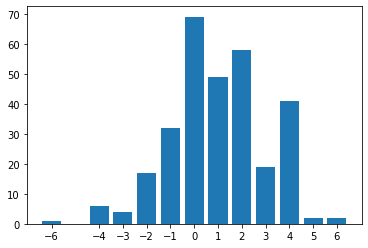

In [20]:
# Plot data kolom sentiment
labels, counts = np.unique(df["sentiment"], return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.show()

In [23]:
#lakukan analisis dan tarik kesimpulan dari Text analysis dan Sentiment Analysis
#masukkan analisis kalian pada sel berikut.

'''
Keseluruhan tweet membahas tentang protokol kesehatan demi mencegah penyebaran
covid omicron ini sehingga virus ini dapat dibasmi segera. Dalam upaya
pencegahan penyebaran covid omicron ini perlu upaya yang efektif. Upaya tersebut
adalah penerapan PPKM yang dilakukan pemerintah, masyarakat harus disiplin dalam
protokol kesehatan, dan masyarakat harus melakukan vaksinasi segera mungkin.

Dapat diketahui bahwa mayoritas masyarakat twitter menulis tweet berada pada
11 - 16 kata per tweet dengan setiap kata berada diantara 6 - 7 karakter dan
total 70 - 120 karakter. Sehingga dapat disimpulkan bahwa banyak yang memberikan
tanggapan tentang kasus covid omicron.

Berdasarkan 300 tweet tentang pembahasan omicron, sentimen masyarakat twitter
berada ke arah positif dengan signifikan. Hal ini menjelaskan bahwa masyarakat
twitter berpikiran positif dalam menghadapi kasus covid omicron yang sedang naik
jumlah kasusnya. 
'''

'\nKeseluruhan tweet membahas tentang protokol kesehatan demi mencegah penyebaran\ncovid omicron ini sehingga virus ini dapat dibasmi segera. Dalam upaya\npencegahan penyebaran covid omicron ini perlu upaya yang efektif. Upaya tersebut\nadalah penerapan PPKM yang dilakukan pemerintah, masyarakat harus disiplin dalam\nprotokol kesehatan, dan masyarakat harus melakukan vaksinasi segera mungkin.\n\nDapat diketahui bahwa mayoritas masyarakat twitter menulis tweet berada pada\n11 - 16 kata per tweet dengan setiap kata berada diantara 6 - 7 karakter dan\ntotal 70 - 120 karakter. Sehingga dapat disimpulkan bahwa banyak yang memberikan\ntanggapan tentang kasus covid omicron.\n\nBerdasarkan 300 tweet tentang pembahasan omicron, sentimen masyarakat twitter\nberada ke arah positif dengan signifikan. Hal ini menjelaskan bahwa masyarakat\ntwitter berpikiran positif dalam menghadapi kasus covid omicron yang sedang naik\njumlah kasusnya. \n'